In [1]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as plty

The following code blocks helps to import the csv files saved

In [2]:
#X
X_lp4 = pd.read_csv("Data_files\X\X_lp4.csv").dropna()

In [3]:
#Y
Y_lp4 = pd.read_csv("Data_files\Y\Y_lp4.csv")

The next step is to find the corelation.
A benchmark of 80 percent is kept in order to eliminate corelated variables since the dataset is small

In [4]:
X_lp4.corr(method = 'pearson')

,Fx_lp4,Fy_lp4,Fz_lp4,Tx_lp4,Ty_lp4,Tz_lp4
Fx_lp4,1.000000,0.083579,-0.043965,0.326116,-0.138275,0.296317
Fy_lp4,0.083579,1.000000,0.596403,0.020936,0.054050,0.246898
Fz_lp4,-0.043965,0.596403,1.000000,-0.228968,0.161955,0.073165
Tx_lp4,0.326116,0.020936,-0.228968,1.000000,0.077543,0.147110
Ty_lp4,-0.138275,0.054050,0.161955,0.077543,1.000000,-0.216352
Tz_lp4,0.296317,0.246898,0.073165,0.147110,-0.216352,1.000000


Since there is no corelation among variables in the datset, other analysis can be done

Adding 2 more rows of resultant force and torque using the formula.
F= √(F_X^2+F_Y^2+ F_Z^2 ) and similarly for T

In [5]:
X_lp4["F_lp4"] = (X_lp4['Fx_lp4']**2 + X_lp4['Fy_lp4']**2 + X_lp4["Fz_lp4"]**2)**0.5
X_lp4["T_lp4"] = (X_lp4["Tx_lp4"]**2 + X_lp4["Ty_lp4"]**2 + X_lp4["Tz_lp4"]**2)**0.5

Applying Min-Max normalization for all the attributes

In [6]:
X_lp4 = (X_lp4 - X_lp4.min())/(X_lp4.max() - X_lp4.min())

In [7]:
X_lp4.head()

,Fx_lp4,Fy_lp4,Fz_lp4,Tx_lp4,Ty_lp4,Tz_lp4,F_lp4,T_lp4
0,0.655019,0.468293,0.901363,0.450543,0.598668,0.502033,0.005279,0.006269
1,0.655019,0.467073,0.901363,0.450543,0.598668,0.504065,0.005258,0.006210
2,0.655019,0.467073,0.902107,0.450543,0.598668,0.504065,0.006079,0.006210
3,0.655019,0.468293,0.901363,0.450543,0.598668,0.502033,0.005279,0.006269
4,0.654275,0.467073,0.901859,0.450543,0.598668,0.502033,0.005836,0.006269


PCA on the resultant values

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_lp4[["F_lp4", "T_lp4"]])
print(pca.explained_variance_ratio_)

[0.90267082 0.09732918]


<AxesSubplot:>

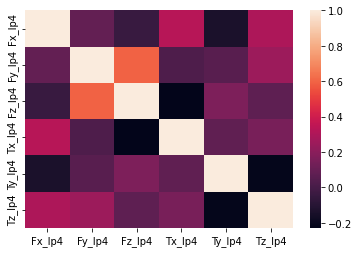

In [9]:
sns.heatmap(X_lp4[["Fx_lp4", "Fy_lp4", "Fz_lp4", "Tx_lp4", "Ty_lp4", "Tz_lp4"]].corr())

Converting the DF to numpy so as to convert it into 3d arrays and compute the average and overall force torque values
Followed by reshaping it into 3d numpy arrays

In [10]:
X_lp4_numpy = X_lp4.to_numpy()
X_lp4_numpy = X_lp4_numpy.reshape(-1,15,8)

In [11]:
print(X_lp4_numpy.shape)
print(X_lp4_numpy)

(117, 15, 8)
[[[6.55018587e-01 4.68292683e-01 9.01363073e-01 ... 5.02032520e-01
   5.27864136e-03 6.26858730e-03]
  [6.55018587e-01 4.67073171e-01 9.01363073e-01 ... 5.04065041e-01
   5.25818609e-03 6.21044454e-03]
  [6.55018587e-01 4.67073171e-01 9.02106568e-01 ... 5.04065041e-01
   6.07857002e-03 6.21044454e-03]
  ...
  [6.55762082e-01 4.68292683e-01 9.03593556e-01 ... 5.02032520e-01
   7.72208254e-03 7.54492878e-03]
  [6.57249071e-01 4.64634146e-01 9.02106568e-01 ... 5.04065041e-01
   6.06069793e-03 7.49561725e-03]
  [6.55018587e-01 4.68292683e-01 9.03593556e-01 ... 5.04065041e-01
   7.73624911e-03 5.20546024e-03]]

 [[6.54275093e-01 4.68292683e-01 9.01858736e-01 ... 5.04065041e-01
   5.85450675e-03 7.69116766e-03]
  [6.55018587e-01 4.68292683e-01 9.01115242e-01 ... 5.04065041e-01
   5.00654713e-03 6.93275895e-03]
  [6.54275093e-01 4.68292683e-01 9.02106568e-01 ... 5.04065041e-01
   6.12598495e-03 6.93275895e-03]
  ...
  [6.53531599e-01 4.69512195e-01 9.01858736e-01 ... 5.02032520e-

Taking the mean of all the 15 readings for all the 8 columns

In [12]:
X_lp4_avg = np.mean(X_lp4_numpy, axis=1)

Converting to dataframes for better visualisation

In [13]:
X_lp4_dfprime = pd.DataFrame(X_lp4_avg, columns=["Fx_lp4", "Fy_lp4", "Fz_lp4", "Tx_lp4", "Ty_lp4", "Tz_lp4", "F_lp4", "T_lp4"])

Combining X and Y 

In [14]:
X_lp4_df = pd.concat([X_lp4_dfprime, Y_lp4], axis = 1)

X_lp4_df = 

In [15]:
print(X_lp4_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fx_lp4  117 non-null    float64
 1   Fy_lp4  117 non-null    float64
 2   Fz_lp4  117 non-null    float64
 3   Tx_lp4  117 non-null    float64
 4   Ty_lp4  117 non-null    float64
 5   Tz_lp4  117 non-null    float64
 6   F_lp4   117 non-null    float64
 7   T_lp4   117 non-null    float64
 8   Y_lp4   117 non-null    float64
dtypes: float64(9)
memory usage: 8.4 KB
None


In [16]:
print(X_lp4_df.describe())

           Fx_lp4      Fy_lp4      Fz_lp4      Tx_lp4      Ty_lp4      Tz_lp4  \
count  117.000000  117.000000  117.000000  117.000000  117.000000  117.000000   
mean     0.656764    0.455499    0.856319    0.450711    0.601541    0.499956   
std      0.031018    0.045388    0.100699    0.022296    0.039280    0.025801   
min      0.540570    0.152602    0.288790    0.372899    0.387954    0.360705   
25%      0.653036    0.460000    0.876382    0.445543    0.596503    0.496883   
50%      0.655514    0.466341    0.897034    0.449130    0.601055    0.502304   
75%      0.660421    0.468211    0.899397    0.450797    0.611379    0.507046   
max      0.784734    0.564553    0.903924    0.590145    0.775909    0.642547   

            F_lp4       T_lp4       Y_lp4  
count  117.000000  117.000000  117.000000  
mean     0.050816    0.040603    0.974359  
std      0.111453    0.056059    0.622309  
min      0.001782    0.003675    0.000000  
25%      0.004067    0.007036    1.000000  
50%   

Now is that all the data are checked for null values (no null values present), now data is visualised using various tools

1. Scatter Plot (done on both decimal and log scale)

lp4

In [17]:
dic = {"Fx_lp4": "red", "Fy_lp4": "blue" , "Fz_lp4": "green" , "Tx_lp4": "black", "Tx_lp4": "purple", "Ty_lp4": "orange", "Tz_lp4": "yellow"}
lp4_scatter = plty.scatter(X_lp4_df, x = ["Fx_lp4", "Fy_lp4", "Fz_lp4", "Tx_lp4", "Ty_lp4", "Tz_lp4"],  color_discrete_map= dic)
lp4_logscatter = plty.scatter(X_lp4_df,  x = ["Fx_lp4", "Fy_lp4", "Fz_lp4", "Tx_lp4", "Ty_lp4", "Tz_lp4"] , y= "Y_lp4", log_x=True)
lp4_scatter.show()
lp4_logscatter.show()

Kernel density estimation plot

<AxesSubplot:xlabel='F_lp4', ylabel='Density'>

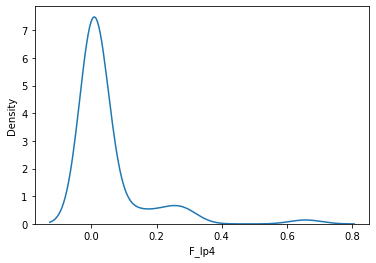

In [18]:
sns.kdeplot(data=X_lp4_df, x = 'F_lp4', bw_method = "scott" , bw_adjust = 1)

<AxesSubplot:xlabel='T_lp4', ylabel='Density'>

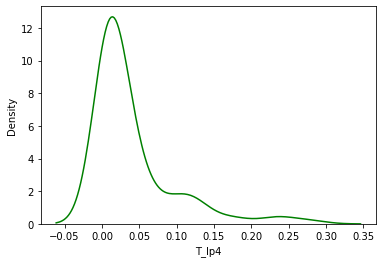

In [19]:
sns.kdeplot(data=X_lp4_df, x = 'T_lp4', color="Green")

In [20]:
plty.scatter(X_lp4_df, x = "F_lp4", y = "T_lp4", color="Y_lp4", log_x=True, log_y=True)

Boxplot

In [21]:
plty.box(X_lp4_df, x = ["F_lp4", "T_lp4"])

Refining the cluster and plotting scatter and box plots without outliers

In [22]:
#X_lp4_df = X_lp4_df.drop(X_lp4_df[((X_lp4_df.F_lp4 < 0.09) & (X_lp4_df.Y_lp4==1))].index)
# X_lp4_df.loc[X_lp4_df["T_lp4"] > 0.0995, "T_lp4"] = 0.0994
# X_lp4_df.loc[X_lp4_df["F_lp4"] > 0.0455, "F_lp4"] = 0.0454

In [23]:
plty.scatter(X_lp4_df, x = "F_lp4", y = "T_lp4", color="Y_lp4", log_x=True, log_y=True)

In [24]:
plty.scatter(X_lp4_df, x = ["Fx_lp4", "Fy_lp4", "Fz_lp4", "Tx_lp4", "Ty_lp4", "Tz_lp4"],   color_discrete_map= dic)

In [25]:
plty.scatter(X_lp4_df, x = ["Fx_lp4", "Fy_lp4", "Fz_lp4", "Tx_lp4", "Ty_lp4", "Tz_lp4"],   color= "Y_lp4")

Boxplot

In [26]:
plty.box(X_lp4_df, x = ["F_lp4", "T_lp4"])

To know the class distribution

In [27]:
np.unique(Y_lp4.to_numpy(), return_counts=True)

(array([0., 1., 2.]), array([24, 72, 21], dtype=int64))

Training the dataset

Splitting test and train set in the ratio of 70:30

In [28]:
from sklearn.model_selection import train_test_split

lp4_train, lp4_test = train_test_split(X_lp4_df, test_size=0.3, random_state=2)


1. Decision Tree

In [29]:
print("Training using Decision Tree...")
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_validate
acc = pd.DataFrame(columns={"Model": [], "Train": [], "Dev": [], "Test":[], "Precision Score": [], "Recall Score": [], "F1 Score": [] })
X = lp4_train[["F_lp4", "T_lp4" ]]
Y = lp4_train["Y_lp4"]
lp4_model = tree.DecisionTreeClassifier(max_depth=2)
treemodel = cross_validate(lp4_model, X, Y, cv=3,return_train_score=True)
lp4_model.fit(X, Y)

Training using Decision Tree...


DecisionTreeClassifier(max_depth=2)

Results

In [30]:
print("++++++Decision Tree++++++")
print("+++Train Results+++\nParametes: \n",lp4_model.get_params())
train_pred = lp4_model.predict(lp4_train[["F_lp4", "T_lp4"]])
accuracy_scr1 = treemodel['train_score'].mean()
print("\nTrain Score", treemodel['train_score'].mean())
print("_____________________________________________________________________________________")
print("Validation Score", treemodel['test_score'].mean())
print("_____________________________________________________________________________________")
print("\n+++Test Results+++\nParametes: \n",lp4_model.get_params())
test_pred = lp4_model.predict(lp4_test[["F_lp4", "T_lp4"]])
print("\nPrediction of test set:", test_pred)
accuracy_scr2 = accuracy_score(lp4_test["Y_lp4"], test_pred)
print("\nTest accuracy score", accuracy_scr2)
confMat = confusion_matrix(lp4_test["Y_lp4"], test_pred, labels=[0,1,2])
print("\nConfusion Matrix:\n",confMat)
prec_tree = precision_score(lp4_test["Y_lp4"], test_pred, average=None, zero_division=0)
print("\nPrecision Score:",prec_tree)
Rec_tree = recall_score(lp4_test["Y_lp4"], test_pred, average=None, zero_division=0)
print("Recall Score:",Rec_tree)
f1_tree = f1_score(lp4_test["Y_lp4"], test_pred, average=None, zero_division=0)
print("F1 Score:",f1_tree)
acc.loc[len(acc.index)] = ['Decision Tree', accuracy_scr1, treemodel['test_score'].mean(), accuracy_scr2, prec_tree.mean(), Rec_tree.mean(), f1_tree.mean()] 

++++++Decision Tree++++++
+++Train Results+++
Parametes: 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

Train Score 0.9197530864197531
_____________________________________________________________________________________
Validation Score 0.8765432098765431
_____________________________________________________________________________________

+++Test Results+++
Parametes: 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

Prediction of test set: [1. 1. 1. 2. 0. 2. 1. 2. 1. 1. 1. 1. 1. 1. 0. 0. 2. 1. 0. 1. 1. 1. 1. 0.
 1. 1. 0. 0. 0. 1.

In [31]:
#lp4_model.predict_proba(lp4_test[["F_lp4", "T_lp4"]])

Printing the tree

[Text(0.6, 0.8333333333333334, 'X[0] <= 0.099\ngini = 0.512\nsamples = 81\nvalue = [14, 53, 14]'),
 Text(0.4, 0.5, 'X[1] <= 0.007\ngini = 0.368\nsamples = 69\nvalue = [14, 53, 2]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.388\nsamples = 19\nvalue = [14, 5, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.077\nsamples = 50\nvalue = [0, 48, 2]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 12]')]

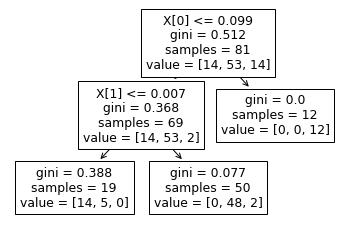

In [32]:
tree.plot_tree(lp4_model)

Exporting the model to txt file

In [33]:
# from sklearn.tree import export_text
# lp4export_tree = export_text(lp4_model) 
# with open('lp4exportree.txt', 'w') as f:
#     f.writelines(lp4export_tree)

2. Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
lp4_forest = RandomForestClassifier(max_depth=3)
X = lp4_train[["F_lp4", "T_lp4"]]
Y = lp4_train["Y_lp4"]
forestmodel = cross_validate(lp4_forest, X, Y, cv=3,return_train_score=True)
lp4_forest.fit(X, Y)

RandomForestClassifier(max_depth=3)

In [35]:
print("++++++Random Forest++++++")
print("+++Train Results+++\nParametes: \n",lp4_forest.get_params())
train_pred = lp4_forest.predict(lp4_train[["F_lp4", "T_lp4"]])
accuracy_scr1 = forestmodel['train_score'].mean()
print("\nTrain Score", forestmodel['train_score'].mean())
print("_____________________________________________________________________________________")
print("Validation Score", forestmodel['test_score'].mean())
print("_____________________________________________________________________________________")
print("+++Test Results+++\nParametes: \n",lp4_forest.get_params())
test_pred = lp4_forest.predict(lp4_test[["F_lp4", "T_lp4"]])
#print("\nPrediction of test set:", test_pred)
accuracy_scr2 = accuracy_score(lp4_test["Y_lp4"], test_pred)
print("\nTest accuracy score", accuracy_scr2)
confMat = confusion_matrix(lp4_test["Y_lp4"], test_pred, labels=[0,1,2])
print("Confusion Matrix:\n",confMat)
prec_forest = precision_score(lp4_test["Y_lp4"], test_pred, average=None, zero_division=0)
print("\nPrecision Score:",prec_forest)
Rec_forest = recall_score(lp4_test["Y_lp4"], test_pred, average=None, zero_division=0)
print("Recall Score:",Rec_forest)
f1_forest = f1_score(lp4_test["Y_lp4"], test_pred, average=None, zero_division=0)
print("F1 Score:",f1_forest)
acc.loc[len(acc.index)] = ['Random Forest', accuracy_scr1, forestmodel['test_score'].mean(), accuracy_scr2, prec_forest.mean(), Rec_forest.mean(), f1_forest.mean()] 

++++++Random Forest++++++
+++Train Results+++
Parametes: 
 {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Train Score 0.95679012345679
_____________________________________________________________________________________
Validation Score 0.8641975308641975
_____________________________________________________________________________________
+++Test Results+++
Parametes: 
 {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_es

3. Support Vector Machines

In [36]:
from sklearn import svm
X = lp4_train[["F_lp4", "T_lp4" ]]
Y = lp4_train["Y_lp4"]
lp4_SVM_Model = svm.SVC(decision_function_shape='ovo')
svmmodel = cross_validate(lp4_SVM_Model, X, Y, cv=3,return_train_score=True)
lp4_SVM_Model.fit(X, Y)

SVC(decision_function_shape='ovo')

In [37]:
print("++++++Support Vector Machines++++++")
print("+++Train Results+++\nParametes: \n",lp4_SVM_Model.get_params())
train_pred = lp4_SVM_Model.predict(lp4_train[["F_lp4", "T_lp4"]])
accuracy_scr1 = svmmodel['train_score'].mean()
print("\nTrain Score", svmmodel['train_score'].mean())
print("_____________________________________________________________________________________")
print("Validation Score", svmmodel['test_score'].mean())
print("_____________________________________________________________________________________")
print("+++Test Results+++\nParametes: \n",lp4_SVM_Model.get_params())
X_test = lp4_test[["F_lp4", "T_lp4" ]]
Y_test = lp4_test["Y_lp4"]
test_pred = lp4_SVM_Model.predict(X_test)
accuracy_scr2 = accuracy_score(Y_test, test_pred)
print("\nTest Accuracy", accuracy_scr2)
confMat = confusion_matrix(lp4_test["Y_lp4"], test_pred, labels=[0,1,2])
print("Confusion Matrix:\n",confMat)
prec_SVM = precision_score(lp4_test["Y_lp4"], test_pred, average=None, zero_division=0)
print("\nPrecision Score:",prec_SVM)
Rec_SVM = recall_score(lp4_test["Y_lp4"], test_pred, average=None, zero_division=0)
print("Recall Score:",Rec_SVM)
f1_SVM = f1_score(lp4_test["Y_lp4"], test_pred, average=None, zero_division=0)
print("F1 Score:",f1_SVM)
acc.loc[len(acc.index)] = ['SVM', accuracy_scr1, svmmodel['test_score'].mean(), accuracy_scr2,prec_SVM.mean(), Rec_SVM.mean(), f1_SVM.mean()] 

++++++Support Vector Machines++++++
+++Train Results+++
Parametes: 
 {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovo', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Train Score 0.8024691358024691
_____________________________________________________________________________________
Validation Score 0.8024691358024691
_____________________________________________________________________________________
+++Test Results+++
Parametes: 
 {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovo', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Test Accuracy 0.6944444444444444
Confusion Matrix:
 [[ 0 10  0]
 [ 0 19  0]
 [ 0  1  6]]

Precisio

4. Gaussian Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB
X = lp4_train[["F_lp4", "T_lp4" ]]
Y = lp4_train["Y_lp4"]
lp4_GNB_Model = GaussianNB()
gnbmodel = cross_validate(lp4_GNB_Model, X, Y, cv=3,return_train_score=True)
lp4_GNB_Model.fit(X, Y)

GaussianNB()

In [39]:
print("++++++Gaussian Naive Bayes++++++")
print("+++Train Results+++\nParametes: \n",lp4_GNB_Model.get_params())
train_pred = lp4_GNB_Model.predict(lp4_train[["F_lp4", "T_lp4"]])
accuracy_scr1 = gnbmodel['train_score'].mean()
print("\nTrain Score", gnbmodel['train_score'].mean())
print("_____________________________________________________________________________________")
print("Validation Score", gnbmodel['test_score'].mean())
print("_____________________________________________________________________________________")
X_test = lp4_test[["F_lp4", "T_lp4" ]]
Y_test = lp4_test["Y_lp4"]
test_pred = lp4_GNB_Model.predict(X_test)
accuracy_scr2 = accuracy_score(Y_test, test_pred)
print("Test Accuracy", accuracy_scr2)
confMat = confusion_matrix(lp4_test["Y_lp4"], test_pred, labels=[0,1,2])
print("Confusion Matrix:\n",confMat)
prec_GNB = precision_score(lp4_test["Y_lp4"], test_pred, average=None, zero_division=0)
print("\nPrecision Score:",prec_GNB)
Rec_GNB = recall_score(lp4_test["Y_lp4"], test_pred, average=None, zero_division=0)
print("Recall Score:",Rec_GNB)
f1_GNB = f1_score(lp4_test["Y_lp4"], test_pred, average=None, zero_division=0)
print("F1 Score:",f1_GNB)
acc.loc[len(acc.index)] = ['Gaussian Naive Bayes', accuracy_scr1, gnbmodel['test_score'].mean(), accuracy_scr2, prec_GNB.mean(), Rec_GNB.mean(), f1_GNB.mean()] 

++++++Gaussian Naive Bayes++++++
+++Train Results+++
Parametes: 
 {'priors': None, 'var_smoothing': 1e-09}

Train Score 0.9012345679012346
_____________________________________________________________________________________
Validation Score 0.8765432098765432
_____________________________________________________________________________________
Test Accuracy 0.8611111111111112
Confusion Matrix:
 [[10  0  0]
 [ 1 15  3]
 [ 0  1  6]]

Precision Score: [0.90909091 0.9375     0.66666667]
Recall Score: [1.         0.78947368 0.85714286]
F1 Score: [0.95238095 0.85714286 0.75      ]


5. Shallow Neural Networks

Splitting the data as test validation (dev) and train set using stratified shuffling with 4 n splits

In [40]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=0)
lp4_train = sss.split(X_lp4_df[["F_lp4", "T_lp4" ]], X_lp4_df["Y_lp4"])
for train,test in sss.split(X_lp4_df[["F_lp4", "T_lp4" ]], X_lp4_df["Y_lp4"]):
    X = X_lp4_df[["F_lp4", "T_lp4" ]].iloc[train]
    Y = X_lp4_df["Y_lp4"].iloc[train]
    X_dt = X_lp4_df[["F_lp4", "T_lp4" ]].iloc[test]
    Y_dt = X_lp4_df["Y_lp4"].iloc[test]
sss = StratifiedShuffleSplit(n_splits=4, test_size=0.5, random_state=0)
for train,test in sss.split(X_dt, Y_dt):
    xd = X_dt.iloc[train]
    yd = Y_dt.iloc[train]
    X_test = X_dt.iloc[test]
    Y_test = Y_dt.iloc[test]
# lp4_train, lp4_Devtest = train_test_split(X_lp4_df, test_size=0.3, random_state=2)
# lp4_dev, lp4_test = train_test_split(lp4_Devtest, test_size=0.5, random_state=2)
# print(xd.value_counts())  
# print(yd.value_counts())
# print(X_test.value_counts())  
# print(Y_test.value_counts())

In [41]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf   #For reproducability
tf.random.set_seed(2)
lp4_SNN_model = tf.keras.Sequential()
lp4_SNN_model.add(Dense(2, activation='LeakyReLU', input_shape = (2,)))
lp4_SNN_model.add(Dense(100, activation='LeakyReLU'))
#lp4_SNN_model.add(Dropout(0.2))
lp4_SNN_model.add(Dense(30, activation='LeakyReLU'))
# lp4_SNN_model.add(Dense(84, activation='relu'))
# lp4_SNN_model.add(Dense(84, activation='relu'))
# lp4_SNN_model.add(Dense(14, activation='relu'))
lp4_SNN_model.add(Dense(4, activation='softmax'))

In [42]:
#opti = keras.optimizers.experimental.SGD(learning_rate=0.01)
opti = keras.optimizers.Adam(learning_rate=0.007)
lp4_SNN_model.compile(optimizer=opti, loss='sparse_categorical_crossentropy', metrics=["accuracy"])
history = lp4_SNN_model.fit(X, Y, batch_size=4, epochs=65, validation_data = (xd, yd))

Epoch 1/65
21/21 [==============================] - 1s 26ms/step - loss: 1.1401 - accuracy: 0.5926 - val_loss: 0.9868 - val_accuracy: 0.6111
Epoch 2/65
21/21 [==============================] - 0s 4ms/step - loss: 0.9290 - accuracy: 0.6420 - val_loss: 0.9225 - val_accuracy: 0.6111
Epoch 3/65
21/21 [==============================] - 0s 4ms/step - loss: 0.7869 - accuracy: 0.7037 - val_loss: 1.0305 - val_accuracy: 0.6111
Epoch 4/65
21/21 [==============================] - 0s 5ms/step - loss: 0.7014 - accuracy: 0.7407 - val_loss: 0.8084 - val_accuracy: 0.6667
Epoch 5/65
21/21 [==============================] - 0s 4ms/step - loss: 0.6205 - accuracy: 0.7654 - val_loss: 0.7600 - val_accuracy: 0.7222
Epoch 6/65
21/21 [==============================] - 0s 3ms/step - loss: 0.5976 - accuracy: 0.7531 - val_loss: 0.7539 - val_accuracy: 0.7222
Epoch 7/65
21/21 [==============================] - 0s 4ms/step - loss: 0.6077 - accuracy: 0.7531 - val_loss: 0.7937 - val_accuracy: 0.6111
Epoch 8/65
21/21 [=

Plotting loss vs epoch

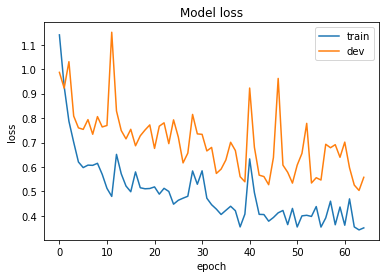

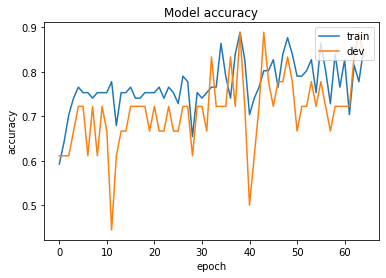

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper right')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper right')
plt.show()

In [44]:
lp4_SNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 100)               300       
                                                                 
 dense_2 (Dense)             (None, 30)                3030      
                                                                 
 dense_3 (Dense)             (None, 4)                 124       
                                                                 
Total params: 3,460
Trainable params: 3,460
Non-trainable params: 0
_________________________________________________________________


In [45]:
pred = lp4_SNN_model.predict(X_test)
# #print(pred*100)
pred_class = np.argmax(pred, axis=1)
# #print(pred_class)
# acc_score_SNN = accuracy_score(Y_test, pred_class)
# print(acc_score_SNN)
confMat = confusion_matrix(Y_test, pred_class, labels=[0,1,2])
print("Confusion Matrix:\n",confMat)
prec_SNN = precision_score(Y_test, pred_class, average=None, zero_division=0)
print("\nPrecision Score:",prec_SNN)
Rec_SNN = recall_score(Y_test, pred_class, average=None, zero_division=0)
print("Recall Score:",Rec_SNN)
f1_SNN = f1_score(Y_test, pred_class, average=None, zero_division=0)
print("F1 Score:",f1_SNN)

1/1 [==============================] - 0s 466ms/step
Confusion Matrix:
 [[3 0 0]
 [3 8 0]
 [0 0 4]]

Precision Score: [0.5 1.  1. ]
Recall Score: [1.         0.72727273 1.        ]
F1 Score: [0.66666667 0.84210526 1.        ]


In [46]:
print(lp4_SNN_model.metrics_names)
test_accuracy = lp4_SNN_model.evaluate(X_test, Y_test)
print(test_accuracy)

['loss', 'accuracy']
1/1 [==============================] - 0s 305ms/step - loss: 0.3129 - accuracy: 0.8333
[0.31291887164115906, 0.8333333134651184]


In [47]:
acc.loc[len(acc.index)] = ['ANN', ((history.history['accuracy'][-1])),((history.history['val_accuracy'][-1])), test_accuracy[1], prec_SNN.mean(), Rec_SNN.mean(), f1_SNN.mean()] 

Exporting the model and weights

In [48]:
lp4_SNN_model.save('exports/lp4_SNN_Export')
lp4_SNN_model.save_weights('exports/lp4_SNNWeights_Export')

INFO:tensorflow:Assets written to: exports/lp4_SNN_Export\assets


INFO:tensorflow:Assets written to: exports/lp4_SNN_Export\assets


Overall parameters

In [49]:
acc

,Model,Train,Dev,Test,Precision Score,Recall Score,F1 Score
0,Decision Tree,0.919753,0.876543,0.916667,0.933333,0.901504,0.915385
1,Random Forest,0.956790,0.864198,0.833333,0.826998,0.833083,0.828070
2,SVM,0.802469,0.802469,0.694444,0.544444,0.619048,0.566196
3,Gaussian Naive Bayes,0.901235,0.876543,0.861111,0.837753,0.882206,0.853175
4,ANN,0.851852,0.833333,0.833333,0.833333,0.909091,0.836257
